In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bitcoin_usd.csv')

In [2]:
df

,_id,time,high,low,open,close
0,5f5c943ba9115d187c3c8ad4,1470268800,584.89,559.50,566.44,576.22
1,5f5c943ba9115d187c3c8ad5,1470355200,579.97,565.81,576.22,574.66
2,5f5c943ba9115d187c3c8ad6,1470441600,596.68,565.33,574.66,586.45
3,5f5c943ba9115d187c3c8ad7,1470528000,596.01,580.87,586.45,590.85
4,5f5c943ba9115d187c3c8ad8,1470614400,594.24,585.41,590.85,589.24
...,...,...,...,...,...,...
1496,5f5c943ba9115d187c3c90ac,1599523200,10443.72,9855.68,10379.08,10128.54
1497,5f5c943ba9115d187c3c90ad,1599609600,10349.09,9989.63,10128.54,10228.85
1498,5f5c943ba9115d187c3c90ae,1599696000,10493.32,10221.37,10228.85,10345.68
1499,5f5c943ba9115d187c3c90af,1599782400,10412.60,10215.49,10345.68,10398.50


In [3]:
df=df.drop(labels=['_id','time'],axis=1)

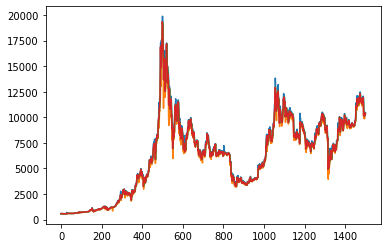

In [4]:
plt.plot(df)
plt.show()

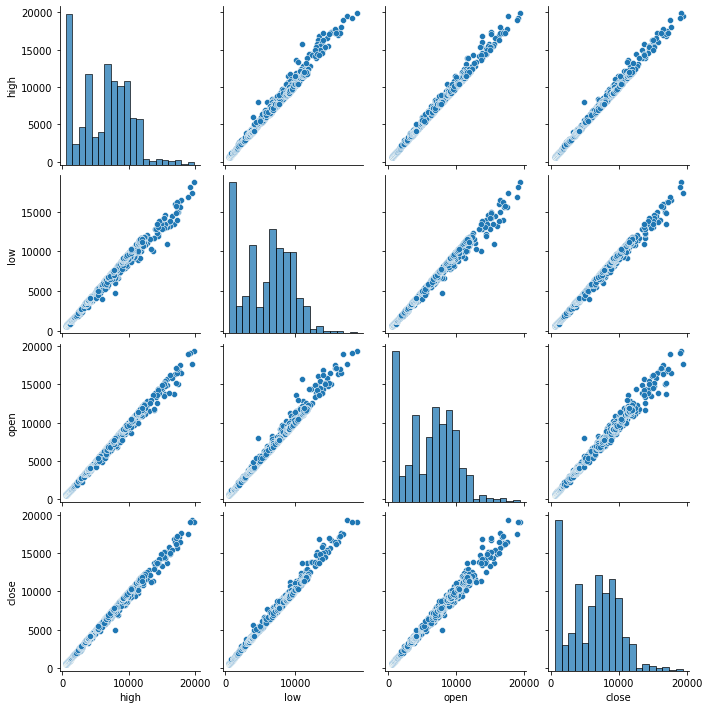

In [5]:
import seaborn as sns
sns.pairplot(df)

In [6]:
df.corr()

,high,low,open,close
high,1.000000,0.995285,0.997839,0.998047
low,0.995285,1.000000,0.996269,0.997598
open,0.997839,0.996269,1.000000,0.995761
close,0.998047,0.997598,0.995761,1.000000


<AxesSubplot:>

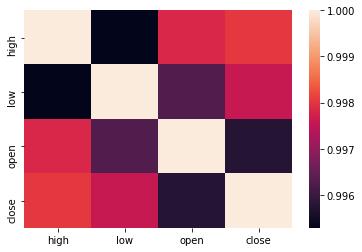

In [7]:
sns.heatmap(df.corr())

In [8]:
y = df['high']

In [9]:
y = np.array(y)

In [10]:
y

array([  584.89,   579.97,   596.68, ..., 10493.32, 10412.6 , 10412.41])

In [11]:
df=df.drop(labels=['high'],axis=1)

In [12]:
df

,low,open,close
0,559.50,566.44,576.22
1,565.81,576.22,574.66
2,565.33,574.66,586.45
3,580.87,586.45,590.85
4,585.41,590.85,589.24
...,...,...,...
1496,9855.68,10379.08,10128.54
1497,9989.63,10128.54,10228.85
1498,10221.37,10228.85,10345.68
1499,10215.49,10345.68,10398.50


In [13]:
X = np.array(df)

In [14]:
X

array([[  559.5 ,   566.44,   576.22],
       [  565.81,   576.22,   574.66],
       [  565.33,   574.66,   586.45],
       ...,
       [10221.37, 10228.85, 10345.68],
       [10215.49, 10345.68, 10398.5 ],
       [10323.17, 10398.5 , 10349.8 ]])

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X1=scaler.fit_transform(X.reshape(-1,3))

In [16]:
X1

array([[1.20934738e-05, 0.00000000e+00, 4.93648601e-04],
       [3.58956289e-04, 5.20762336e-04, 4.10575050e-04],
       [3.32570528e-04, 4.37695951e-04, 1.03841939e-03],
       ...,
       [5.31128327e-01, 5.14500941e-01, 5.20739632e-01],
       [5.30805101e-01, 5.20721868e-01, 5.23552417e-01],
       [5.36724307e-01, 5.23534411e-01, 5.20959031e-01]])

In [17]:
X1.shape

(1501, 3)

In [18]:
n_features = 1
X1 = X1.reshape((X1.shape[0], X1.shape[1], n_features))

In [19]:
X1.shape

(1501, 3, 1)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y1=scaler.fit_transform(y.reshape(-1,1))

In [21]:
y1

array([[5.14105511e-04],
       [2.59125762e-04],
       [1.12512406e-03],
       ...,
       [5.14019999e-01],
       [5.09836673e-01],
       [5.09826826e-01]])

In [22]:
y1.shape

(1501, 1)

In [23]:
# Importing the library
from sklearn.model_selection import train_test_split

In [24]:
#Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

In [25]:
print(X_train.shape), print(y_train.shape)

(1200, 3, 1)
(1200, 1)


(None, None)

In [26]:
print(X_test.shape), print(y_test.shape)

(301, 3, 1)
(301, 1)


(None, None)

In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,GRU
import time

# **GRU**

In [28]:
# define model1 GRU
sg_time = time.time()
model1 = Sequential()
model1.add(GRU(100, activation='linear', return_sequences=True, input_shape=(3, 1)))
model1.add(GRU(50, activation='linear'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
# fit model
model1.fit(X_train, y_train, epochs=100, verbose=1)
eg_time = time.time()
print("Execution Time: ",eg_time-sg_time)

Epoch 1/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0169
Epoch 2/100
38/38 [==============================] - 0s 11ms/step - loss: 3.0867e-04

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model1.predict(X_train)
test_predict=model1.predict(X_test)

In [30]:
### Calculate MSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,train_predict)


9.886086519116406e-05

In [31]:
### Calculate MSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test,test_predict)
mse1

8.483774389509418e-05

In [32]:
### Calculate r2 performance metrics
import math
from sklearn.metrics import r2_score
r1 = r2_score(y_test,test_predict)
r1

0.9978550983248948

# **LSTM**

In [33]:
# define model2 LSTM
sl_time = time.time()
model2 = Sequential()
model2.add(LSTM(100, activation='linear', return_sequences=True, input_shape=(3, 1)))
model2.add(LSTM(50, activation='linear'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
# fit model
model2.fit(X_train, y_train, epochs=100, verbose=1)
el_time = time.time()
print("Execution time: ", el_time-sl_time)

Epoch 1/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0325
Epoch 2/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 3/100
38/38 [==========

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model2.predict(X_train)
test_predict=model2.predict(X_test)

In [35]:
### Calculate MSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,train_predict)

0.00010698523704076967

In [36]:
### Calculate MSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test,test_predict)
mse2

8.713598043032052e-05

In [37]:
### Calculate r2 performance metrics
import math
from sklearn.metrics import r2_score
r2 = r2_score(y_test,test_predict)
r2

0.9977969933922568

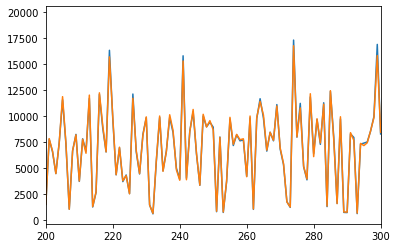

In [38]:
# plot 
plt.plot(scaler.inverse_transform(y_test))
plt.plot(scaler.inverse_transform(test_predict))
plt.xlim(200,300)
plt.show()

In [40]:
df_model = pd.DataFrame({'Model_Applied': ['GRU', 'LSTM'], 'MSE': [mse1, mse2], 'R2': [r1, r2],
                         'Execution Time': [eg_time - sg_time, el_time - sl_time]})
df_model

,Model_Applied,MSE,R2,Execution Time
0,GRU,0.000085,0.997855,43.991490
1,LSTM,0.000087,0.997797,38.761662
